In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras

In [5]:
fasion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fasion_mnist.load_data()

In [36]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [11]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()

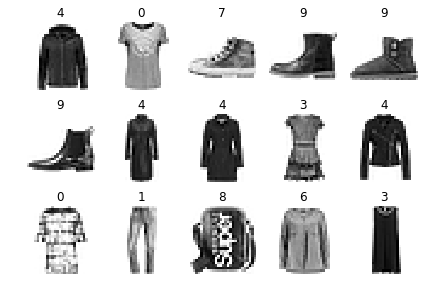

In [51]:
def show_imgs(n_rows, n_cols, x_data, y_data):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary', interpolation = 'nearest')
            plt.axis('off')
            plt.title(y_data[index])
    plt.show()

show_imgs(3,5, x_train, y_train)

In [70]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(784, activation='sigmoid'))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [71]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 5s 92us/sample - loss: 0.9516 - accuracy: 0.7297 - val_loss: 0.6302 - val_accuracy: 0.8030
Epoch 2/15
55000/55000 [==============================] - 5s 85us/sample - loss: 0.5865 - accuracy: 0.8066 - val_loss: 0.5383 - val_accuracy: 0.8230
Epoch 3/15
55000/55000 [==============================] - 5s 85us/sample - loss: 0.5308 - accuracy: 0.8213 - val_loss: 0.5021 - val_accuracy: 0.8328
Epoch 4/15
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5125 - accuracy: 0.8253 - val_loss: 0.4968 - val_accuracy: 0.8350
Epoch 5/15
55000/55000 [==============================] - 5s 86us/sample - loss: 0.5026 - accuracy: 0.8276 - val_loss: 0.5045 - val_accuracy: 0.8288
Epoch 6/15
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5016 - accuracy: 0.8275 - val_loss: 0.5089 - val_accuracy: 0.8282
Epoch 7/15
55000/55000 [==============================] -

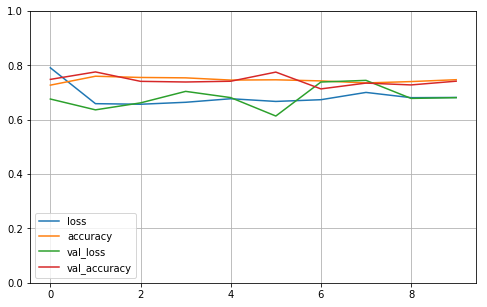

In [58]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)